In [1]:
cd ..

/work


In [2]:
%load_ext autoreload
%autoreload 2

import time 
from src.dbscan import *
from src.utils import *
from src.metrics import *
from src.clusterization_performance import *
from src.datasets import Dataset
from src.dbscanrn_optimalized import *
from src.dbscanrn import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer

np.random.seed(0)
# plt.style.use('dark_background')

# Datasets

### Dataset from lecture

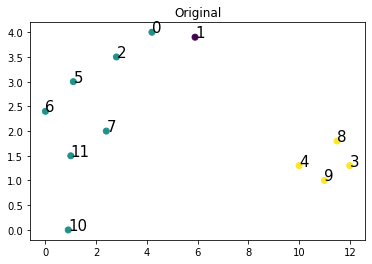

In [3]:
dataset = Dataset('./data/lecture_dataset.txt')
X, y = dataset.X, dataset.y

X_norm = Normalizer().fit_transform(X)

display_points(X, y, 'Original', numerate=True)
# display_points(X_norm, y, 'Normalized')

# DBSCANRN_opt
### cosine dissimilarity, optimized KNN

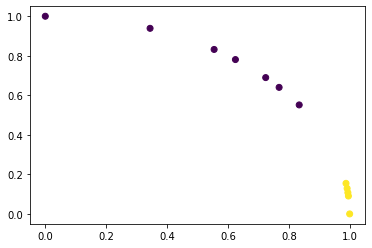

In [7]:
params = {
    'k': 2,
    'similarity': cosine_dissimilarity
}

algorithm = DBSCANRN_opt(**params)

name = get_name(
    algorithm_name=algorithm.name, 
    dataset_name=dataset.name, 
    n_dimentions=dataset.n_dimentions, 
    n_rows=dataset.n_rows,
    **params
)

algorithm.log_output = f'./out/LOG_{name}.log'
algorithm.fit_transform(X_norm)

display_points(algorithm.X, algorithm.y_pred)
score = evaluate(algorithm.y_pred, y, algorithm.X)

In [8]:
log_info = pd.read_csv( f'./out/LOG_{name}.log', names=['Calculations', 'Current index', 'Time'])
log_info.head()

,Calculations,Current index,Time


In [6]:
timer_out = time.time() 
out = pd.DataFrame({
    'point id': np.arange(dataset.n_rows),
    'x': algorithm.X[:, 0],
    'y': algorithm.X[:, 1],
    # '# of distance/similarity calculations': [], ?????
    'point type': algorithm.state, # 1 - core, 0 - border, -1 - noise
    'CId': algorithm.y_pred # clusters: cluster identifier or -1 in the case of noise points
})

out = out.merge(pd.DataFrame({
    'point id': algorithm.number_of_calc.keys(), 
    '# of distance/similarity calculations': algorithm.number_of_calc.values()
}), on='point id')

out.to_csv(f'./out/OUT_{name}.csv', index=False)
out_time = time.time() - timer_out
print(out_time)
out.head()

AttributeError: 'int' object has no attribute 'keys'

In [10]:
out['# of distance/similarity calculations'].mean()

KeyError: '# of distance/similarity calculations'

In [11]:
timer_stat = time.time()
stat = pd.DataFrame({
    'name of the input fil': dataset.name,
    '# of dimensions of a point': dataset.n_dimentions,
    '# of points in the input file': dataset.n_rows,
    'epsilon': params['epsilon'],
    'minPts': params['minPts'],
    'similarity': params['similarity'].__name__,
    'version': ['dbscan'],
    "Eps-neighborhood timer": log_info['Time'][log_info['Calculations'] == 'Eps'].sum(),
    'Clustering timer': log_info['Time'][12],
    'OUT timer': out_time,
    '# of discovered clusters': len(set(algorithm.y_pred[algorithm.y_pred > 0])),
    '# of discovered noise points': sum(out['point type'] == -1),
    '# of discovered core points': sum(out['point type'] == 1),
    '# of discovered border points': sum(out['point type'] == 0),
    'avg # of calculations of distance/similarity': out['# of distance/similarity calculations'].mean(),
    'RAND': score['adjusted_rand_score'],
    'Purity': score['purity'],
    'Silhouette coefficient': score['silhouette_score_euclidean'],
    'Davies Bouldin': score['davies_bouldin_score']
})
stat_time = time.time() - timer_stat
print(stat_time)
stat

KeyError: 'epsilon'

### cosine similarity, optimized KNN

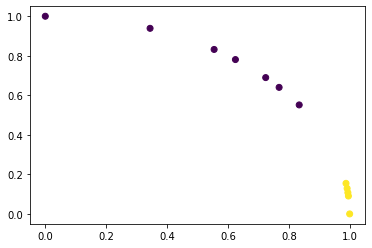

In [4]:
params = {
    'k': 2,
    'similarity': cosine_similarity
}

algorithm = DBSCANRN_opt(**params)

name = get_name(
    algorithm_name=algorithm.name, 
    dataset_name=dataset.name, 
    n_dimentions=dataset.n_dimentions, 
    n_rows=dataset.n_rows,
    **params
)

algorithm.log_output = f'./out/LOG_{name}.log'
algorithm.fit_transform(X_norm)

display_points(algorithm.X, algorithm.y_pred)
score = evaluate(algorithm.y_pred, y, algorithm.X)

In [5]:
log_info = pd.read_csv( f'./out/LOG_{name}.log', names=['Calculations', 'Current index', 'Time'])
log_info.head()

,Calculations,Current index,Time


In [6]:
timer_out = time.time() 
out = pd.DataFrame({
    'point id': np.arange(dataset.n_rows),
    'x': algorithm.X[:, 0],
    'y': algorithm.X[:, 1],
    # '# of distance/similarity calculations': [], ?????
    'point type': algorithm.state, # 1 - core, 0 - border, -1 - noise
    'CId': algorithm.y_pred # clusters: cluster identifier or -1 in the case of noise points
})

out = out.merge(pd.DataFrame({
    'point id': algorithm.number_of_calc.keys(), 
    '# of distance/similarity calculations': algorithm.number_of_calc.values()
}), on='point id')

out.to_csv(f'./out/OUT_{name}.csv', index=False)
out_time = time.time() - timer_out
print(out_time)
out.head()

AttributeError: 'int' object has no attribute 'keys'

In [10]:
out['# of distance/similarity calculations'].mean()

KeyError: '# of distance/similarity calculations'

In [11]:
timer_stat = time.time()
stat = pd.DataFrame({
    'name of the input fil': dataset.name,
    '# of dimensions of a point': dataset.n_dimentions,
    '# of points in the input file': dataset.n_rows,
    'epsilon': params['epsilon'],
    'minPts': params['minPts'],
    'similarity': params['similarity'].__name__,
    'version': ['dbscan'],
    "Eps-neighborhood timer": log_info['Time'][log_info['Calculations'] == 'Eps'].sum(),
    'Clustering timer': log_info['Time'][12],
    'OUT timer': out_time,
    '# of discovered clusters': len(set(algorithm.y_pred[algorithm.y_pred > 0])),
    '# of discovered noise points': sum(out['point type'] == -1),
    '# of discovered core points': sum(out['point type'] == 1),
    '# of discovered border points': sum(out['point type'] == 0),
    'avg # of calculations of distance/similarity': out['# of distance/similarity calculations'].mean(),
    'RAND': score['adjusted_rand_score'],
    'Purity': score['purity'],
    'Silhouette coefficient': score['silhouette_score_euclidean'],
    'Davies Bouldin': score['davies_bouldin_score']
})
stat_time = time.time() - timer_stat
print(stat_time)
stat

KeyError: 'epsilon'